In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
data = '../../data/raw'
%matplotlib inline
train = pd.read_csv('../../data/raw/train.csv')
depths = pd.read_csv('../../data/raw/depths.csv')

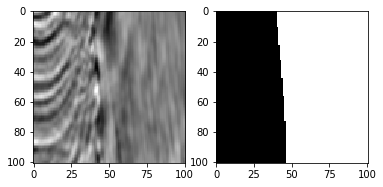

In [53]:
x=1360
img = cv2.imread(data+'/train/images/'+train.iloc[x][0]+'.png')
out = cv2.imread(data+'/train/masks/'+train.iloc[x][0]+'.png')
fig,axlist = plt.subplots(nrows=1,ncols=2)
axlist.ravel()[0].imshow(img)
axlist.ravel()[1].imshow(out)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

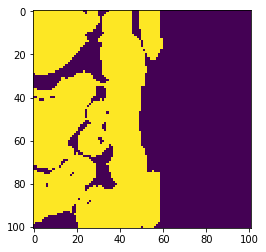

In [54]:
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
gradient=cv2.morphologyEx(gray,cv2.MORPH_GRADIENT,elKernel)
# plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_GRAY2RGB),cmap='gray')
otsu = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(otsu)

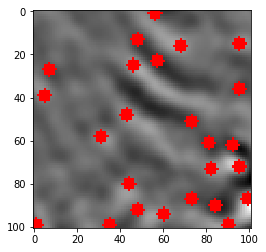

(<matplotlib.image.AxesImage at 0x19564443320>, None)

In [14]:

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()